In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LinearRegression

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [3]:
sc.set_figure_params(dpi=200)

In [4]:
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

In [5]:
combination = 'U'
normalized = False
specific_cell_type = "all"

In [6]:
conditions = ["3m", "6m", "9m"]
source_condition = "3m"
target_condition = "9m"
cell_type_key = "Group"
condition_key = "Timepoint"

In [7]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [8]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [9]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [10]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/tmp/ipykernel_36892/211470072.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ctrl_adata.obs['method'] = source_condition
/tmp/ipykernel_36892/211470072.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  real_adata.obs['method'] = target_condition


In [11]:
real_adata.obs

,Qi ID,sex,Group,Timepoint,Validation,method
32,2143,M,HET,9m,Test,9m
33,2145,M,HET,9m,Train,9m
34,2146,M,HET,9m,Train,9m
35,2147,M,WT,9m,Test,9m
36,2148,M,WT,9m,Train,9m
37,2150,M,WT,9m,Train,9m
38,2156,F,HET,9m,Test,9m
39,2227,F,WT,9m,Test,9m
40,2228,F,WT,9m,Train,9m
41,2229,F,HET,9m,Train,9m


In [12]:
ctrl_adata.X.shape

(16, 2969)

In [13]:
real_adata.X.shape

(16, 2969)

In [14]:
real_adata.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [15]:
real_adata.X[:, 0].shape

(16,)

In [16]:
def create_models(ctrl, real):
    models = []
    x = ctrl[ctrl.obs["Validation"] == "Train"].X
    #x = ctrl.X
    for i in range(len(ctrl.X[0])):
        y = real[real.obs["Validation"] == "Train"].X[:, i]
        #y = real.X[:, i]
        model = LinearRegression().fit(x, y)
        models.append(model)
    return models
        
model_list = create_models(ctrl_adata, real_adata)
model_list

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegres

In [17]:
ctrl_adata.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
1,3132,M,HET,3m,Train,3m
2,3140,M,HET,3m,Train,3m
3,3141,M,HET,3m,Train,3m
4,3153,F,HET,3m,Test,3m
5,3154,F,HET,3m,Train,3m
6,3156,F,HET,3m,Train,3m
7,3157,F,HET,3m,Train,3m
8,3346,F,WT,3m,Test,3m
9,3347,F,WT,3m,Train,3m


In [18]:
ctrl_adata_valid = ctrl_adata[ctrl_adata.obs["Validation"] == "Test"]
#ctrl_adata_valid = ctrl_adata
ctrl_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
4,3153,F,HET,3m,Test,3m
8,3346,F,WT,3m,Test,3m
12,3606,M,WT,3m,Test,3m


In [19]:
predictions = []
for i in range(len(ctrl_adata_valid.X)):
    pred = []
    for j in range(len(ctrl_adata_valid.X[i])):
        p = model_list[j].predict([ctrl_adata_valid.X[i, :]])
        pred.append(p[0])
    predictions.append(pred)

predictions

[[71539.22078748862,
  70180.24200557043,
  107070.75545494162,
  21162.235996981606,
  0.0,
  109347.97455008926,
  0.0,
  94694.96140583442,
  145849.81706280605,
  22383.22427099576,
  154119.10636319173,
  0.0,
  203475.3781284782,
  48222.17912630745,
  156720.07960094902,
  44073.552982540925,
  0.0,
  0.0,
  119033.19260784637,
  27393.085804157774,
  95994.08636450427,
  0.0,
  57437.31333886732,
  573427.2009419778,
  47224.3066800129,
  17695.040081808467,
  264646.6533718337,
  18150.433313474437,
  0.0,
  0.0,
  273970.06764860416,
  24197.387353497394,
  136685.14679454733,
  214151.13635453084,
  1693108.9961496156,
  0.0,
  0.0,
  106345.59962010273,
  63098.40230458614,
  0.0,
  64726.61107871062,
  126512.01889123634,
  0.0,
  1735854.00041566,
  30322.466309337986,
  661075.7789943132,
  35438.630529033515,
  0.0,
  57406.80200559519,
  251514.20183084457,
  760316.1846934786,
  2589905.7419485757,
  245340.63775579998,
  142436.2451625616,
  86169.15272247381,
  3792

In [20]:
np.array(predictions).shape

(4, 2969)

In [21]:
ctrl_adata_valid.var_names.values

array(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', ..., 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'], dtype=object)

In [22]:
ctrl_adata_valid

View of AnnData object with n_obs × n_vars = 4 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method'

In [23]:
vars = pd.DataFrame(index=ctrl_adata_valid.var_names)
regression_reconstructed = sc.AnnData(X=np.array(predictions), obs=ctrl_adata_valid.obs.copy(), var=vars)
regression_reconstructed

AnnData object with n_obs × n_vars = 4 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method'

In [24]:
regression_reconstructed.obs["Timepoint"] = f"{source_condition}_to_{target_condition}"
regression_reconstructed.obs["method"] = "Linear Regression"
regression_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m_to_9m,Test,Linear Regression
4,3153,F,HET,3m_to_9m,Test,Linear Regression
8,3346,F,WT,3m_to_9m,Test,Linear Regression
12,3606,M,WT,3m_to_9m,Test,Linear Regression


In [25]:
real_adata_valid = real_adata[real_adata.obs["Validation"] == "Test"]
#real_adata_valid = real_adata
real_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
32,2143,M,HET,9m,Test,9m
35,2147,M,WT,9m,Test,9m
38,2156,F,HET,9m,Test,9m
39,2227,F,WT,9m,Test,9m


In [26]:
ctrl_adata_valid.obs

,Qi ID,sex,Group,Timepoint,Validation,method
0,3131,M,HET,3m,Test,3m
4,3153,F,HET,3m,Test,3m
8,3346,F,WT,3m,Test,3m
12,3606,M,WT,3m,Test,3m


In [27]:
models = ctrl_adata_valid.concatenate(real_adata_valid, regression_reconstructed)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


array(['3m', '9m', 'Linear Regression'], dtype=object)

In [28]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['Linear Regression'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='Linear Regression',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['Linear Regression']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/

In [29]:
protein_up = up_genes[0]
print(protein_up)

Q9WTU3|SCN8A


/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


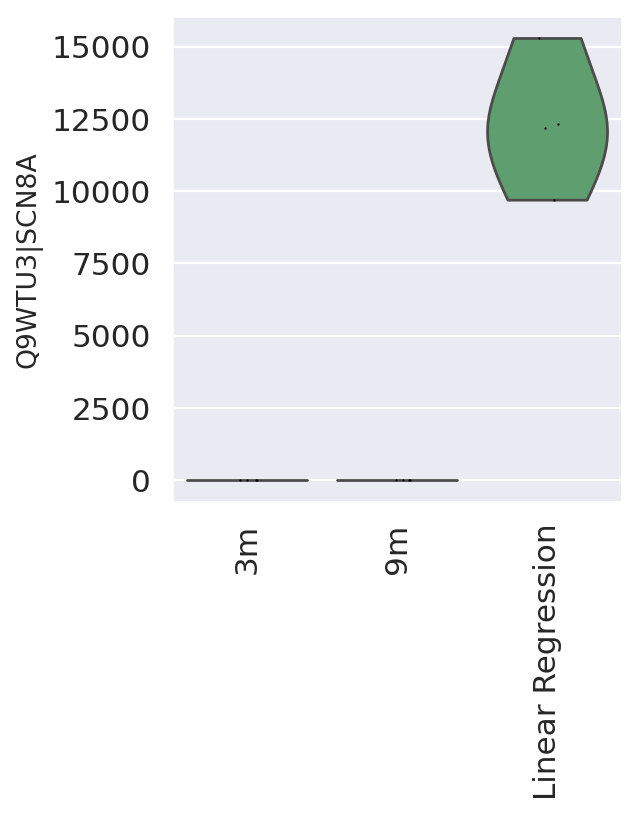

In [30]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [31]:
protein_down = down_genes[0]
print(protein_down)

Q80TJ1|CAPS1


/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


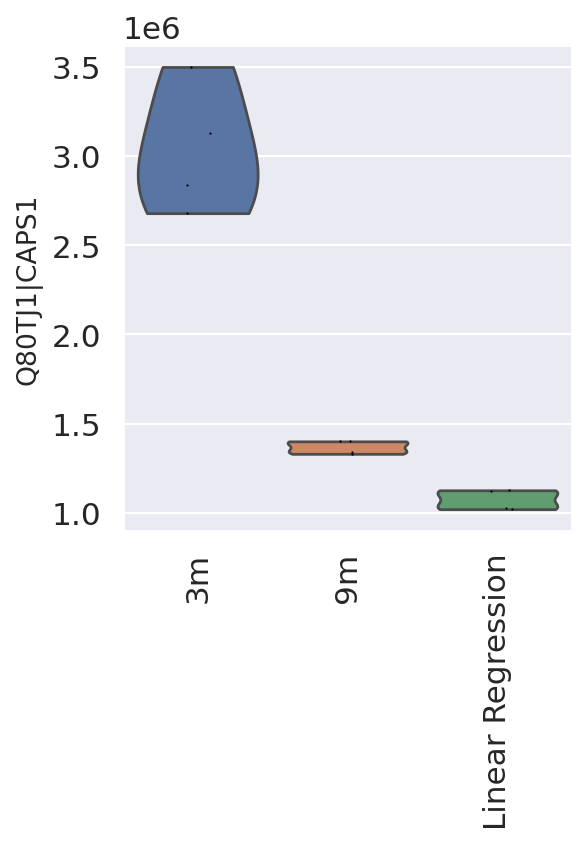

In [32]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/kojo/miniconda3/envs/trVAE3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


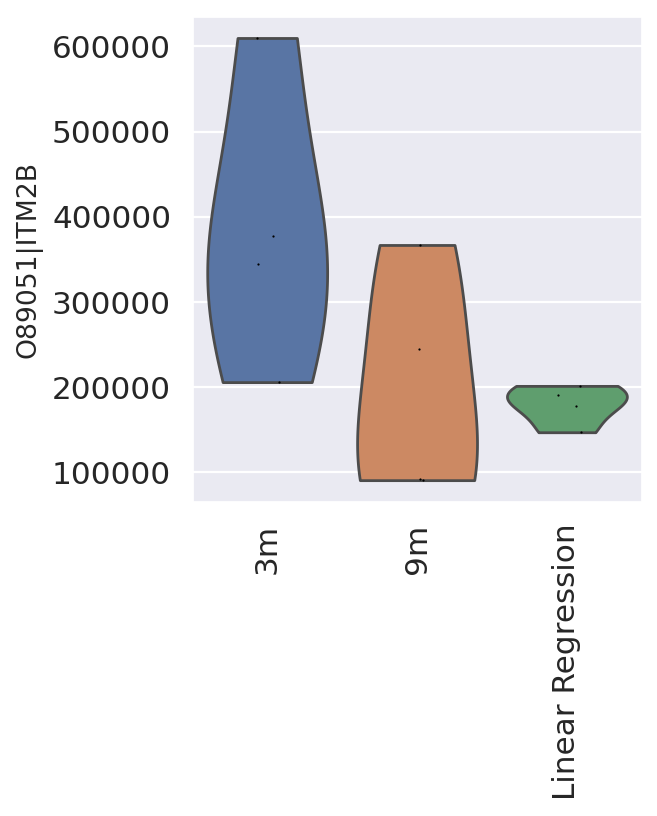

In [33]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

In [34]:
top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.9448857157875177
reg_mean_all: 0.985553138725035


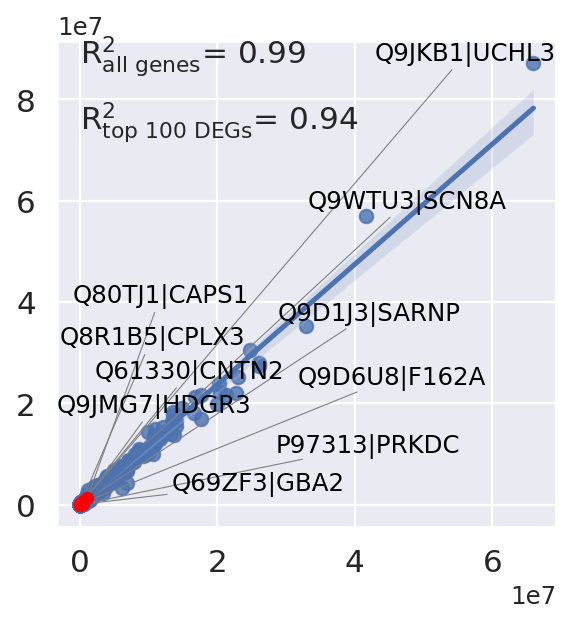

In [35]:
reptrvae.pl.reg_mean_plot(models,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"linearRegression_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.8268433490298621
reg_var_all: 0.7660905555418053


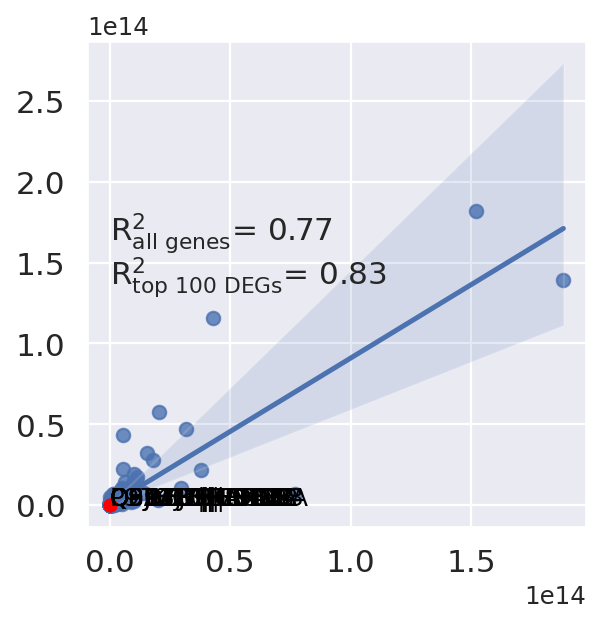

In [36]:
reptrvae.pl.reg_var_plot(models,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"linearRegression_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

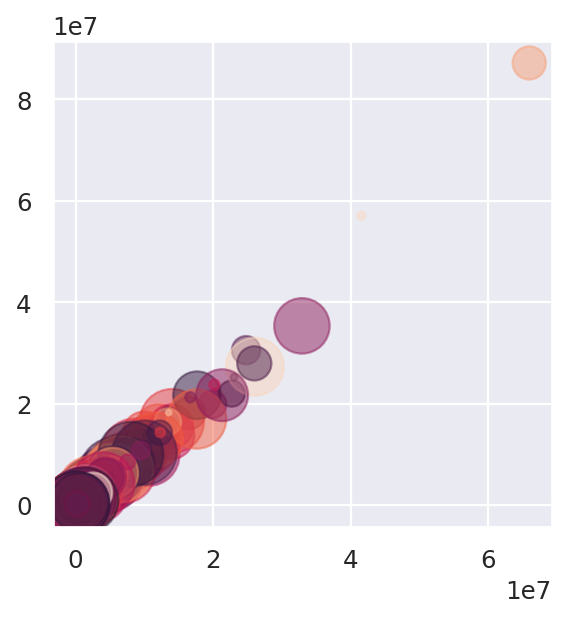

In [37]:
np.random.seed(2432532)

N = len(regression_reconstructed.X[0])
#x = list(protein_meansP.keys())
x = [sum(regression_reconstructed.X[:,i])/len(regression_reconstructed.X[:,i]) for i in range(len(regression_reconstructed.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(real_adata_valid.X[:,i])/len(real_adata_valid.X[:,i]) for i in range(len(real_adata_valid.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [38]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,63383.725658,70900.0
1,61724.215017,58150.0
2,123453.590126,129200.0
3,23487.717698,28100.0
4,0.000000,0.0


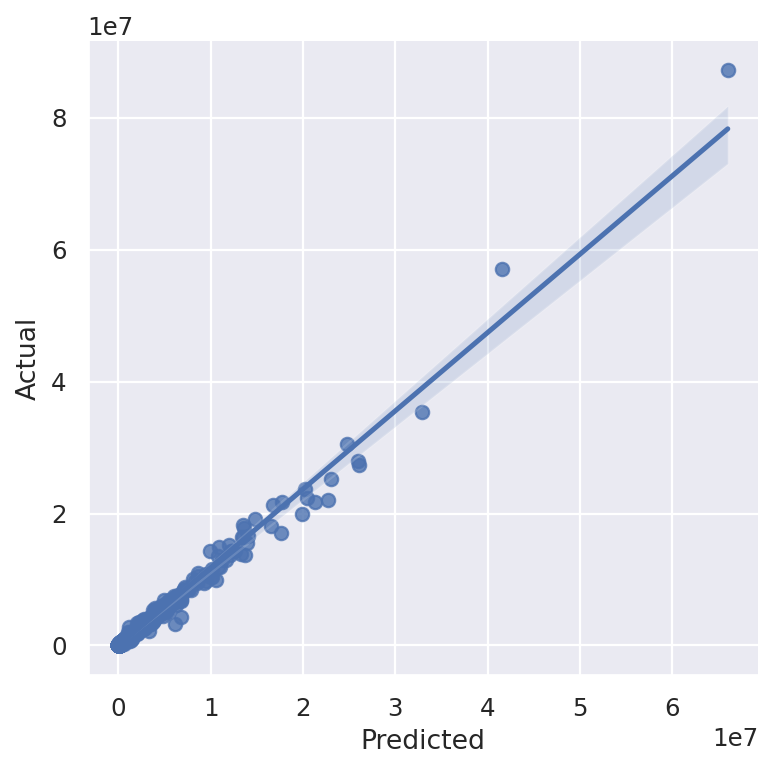

In [39]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [40]:
stats.pearsonr(x, y)

PearsonRResult(statistic=0.9927502902165455, pvalue=0.0)

In [41]:
stats.spearmanr(x, y)

SignificanceResult(statistic=0.992343356717185, pvalue=0.0)